# Исследование объявлений о продаже квартир в Санкт-Петербурге

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Для этого провести исследовательский анализ данных и установить параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**План работы.**  
1. Открыть файл с данными и изучить общую информацию о нем, построить гистограммы для всех числовых столбцов таблицы на одном графике.    
2. Выполнить предобработку данных:
    - Найти и изучить пропущенные значения в столбцах, заполнить их там, где это возможно. Если логичную замену предложить невозможно, то оставить пропуски. 
    - Рассмотреть типы данных в каждом столбце: найти столбцы, в которых нужно изменить тип данных, преобразовать тип данных в выбранных столбцах.  
    - Изучить уникальные значения в столбце с названиями и устранить неявные дубликаты.   
3. Добавить в таблицу новые параметры, которые будут использованы в исследовании.
4. Провести исследовательский анализ данных:   
    - подробнее изучить некоторые параметры объектов и построить отдельные гистограммы для каждого из этих параметров (общая и жилая площадь; площадь кухни; цена объекта; количество комнат; высота потолков; тип этажа квартиры («первый», «последний», «другой»); общее количество этажей в доме; расстояние до центра города и до ближайшего парка в метрах.  
    - Изучить, как быстро продавались квартиры. Этот параметр показывает, сколько дней было размещено каждое объявление.  
    - Определить факторы, которые больше всего влияют на общую стоимость объекта.  
    - Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений, выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.
    - Описать, как стоимость объектов зависит от расстояния (в км) до центра Петербурга.
5. Сформулировать общий вывод.

### Открытие файла с данными и изучение общей информации

In [1]:
# Импортируем библиотеку pandas 
import pandas as pd
# вызов библиотеки matplotlib для построения графиков 
import matplotlib.pyplot as plt  

In [2]:
# Считываем данные из csv-файла в датафрейм и сохраняем в переменную data. 
# Путь к файлу: /datasets/real_estate_data.csv
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t', decimal='.')

In [3]:
data.head(15)  # вывод первых 15 строк файла

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Основная информация о датафрейме:**

In [4]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
# зафиксируем начальное количество данных в переменную data_start с помощью метода shape 
data_start = data.shape
data_start

(23699, 22)

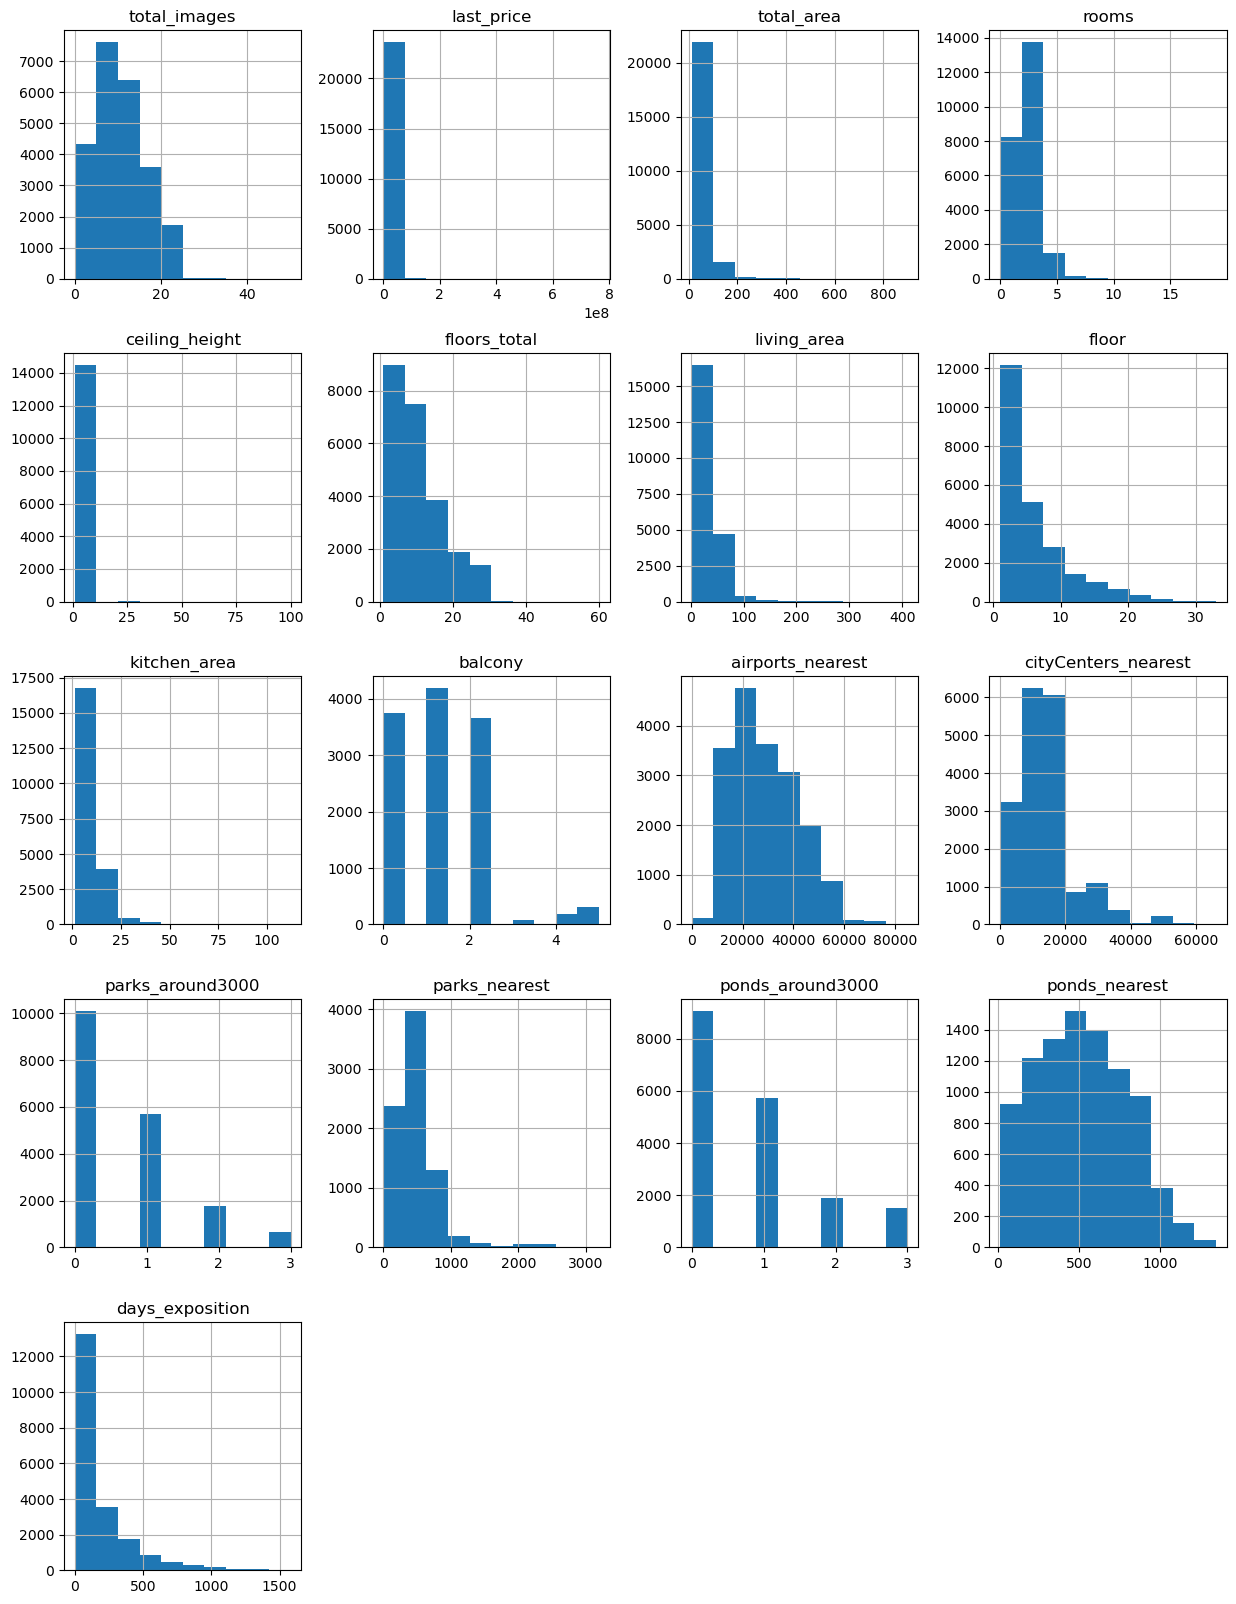

In [6]:
# Построим гистограмму для всех числовых столбцов таблицы на одном графике.
data.hist(figsize=(15, 20));

### Предобработка данных

***Приведем названия всех столбцов к единому стилю.***

In [7]:
# Приведём названия столбцов к змеиному регистру.
data = data.rename(columns = {'cityCenters_nearest':'city_centers_nearest' })

In [8]:
data.columns  # проверим стиль написания в наименовании столбцов.

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

***Выведем количество пропущенных значений для каждого столбца.***

In [9]:
data.isna().sum()  # Используем комбинацию двух методов.

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Обнаружены пропуски как в данных, которые вписаны пользователем, так и в тех, которые получены автоматически на основе картографических данных.  
1) К первой категории относятся пропуски в столбцах:  
    - `ceiling_height` — высота потолков;  
    - `floors_total` — всего этажей в доме;  
    - `living_area` — жилая площадь в квадратных метрах;  
    - `is_apartment` —  апартаменты (булев тип);  
    - `kitchen_area` — площадь кухни в квадратных метрах;  
    - `balcony` — число балконов;  
    - `locality_name` — название населённого пункта.  
    
Наиболее вероятной причиной пропусков в данных столбцах является отсутствие данной информации у продавца или невнимательное заполнение ячеек в объявлении. 

2) К пропускам, полученным на основании картографических данных относятся пропуски в столбцах:  
    - `airports_nearest` — расстояние до ближайшего аэропорта в метрах;   
    - `city_centers_nearest` — расстояние до центра города;  
    - `parks_around3000` — число парков в радиусе 3 км;  
    - `parks_nearest` — расстояние до ближайшего парка;  
    - `ponds_around3000`  — число водоёмов в радиусе 3 км;   
    - `ponds_nearest` — расстояние до ближайшего водоёма;  
    - `days_exposition` — сколько дней было размещено объявление (от публикации до снятия).  
    
Причины появления пропусков во второй группе столбцов могут быть технического характера.

***Заполние пропущенных значений там, где это возможно.***

Наибольшее количество пропусков в колонке "апартаменты". Выясним количество различных значений в этом столбце. 

In [10]:
data.groupby('is_apartment')['is_apartment'].count()

is_apartment
False    2725
True       50
Name: is_apartment, dtype: int64

В графе "аппартаменты" всего 50 значений `True` и 2725 значений `False`. В остальных строках пропуски, которые могут означать, что люди не заполняли этот раздел, если тип жилья у них не является аппартаментами. В этом случае их логично заменить на `False`.

In [11]:
# Заменим все NaN в столбце 'is_apartment' на False
data['is_apartment'] = data['is_apartment'].fillna(False)

Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски можно заменить на число 0.  

In [12]:
# Заменим все NaN в столбце 'balcony' на 0
data['balcony'] = data['balcony'].fillna(0)

Количество пропусков в столбцах `floors_total` и `locality_name` составляет соответственно 0,4% и 0,2%. Их доля настолько мала, что от строк с такими пропусками можно избавиться.

In [13]:
data = data.dropna(subset=['floors_total', 'locality_name'])

Так как значения жилой площади и площади кухни могут значительно отличаться даже в группе квартир с одинаковой общей площадью, а количество объявлений с такими пропусками не превышает 10% общего количества, то пропуски в столбцах `living_area` — жилая площадь и `kitchen_area` — площадь кухни лучше оставить без изменения.

Расстояние до центра города `city_centers_nearest` и ближайшего аэропорта `airports_nearest` в метрах может очень существенно влиять на цену квартиры. Но так как их, как правило, преодолевают на транспорте, то транспортная доступность в этом случае оказывает очень значимое влияние на привлекательность жилья. Пропуски в этих столбцах составляют примерно 23% всех данных, а распределение данных не однородное, поэтому эти пропуски лучше оставить без изменения.  

Картографические данные `parks_around_3000` и `ponds_around_3000`, согласно ТЗ, не участвуют в дальнейшем анализе, поэтому  стоит оставить пропуски этих данных без изменений. 

Пропуски в столбцах `parks_nearest` — расстояние до ближайшего парка и `ponds_nearest` — расстояние до ближайшего водоёма составляют большую часть всех данных (66% и 62% соответственно), поэтому их замена может кардинальным образом поменять все распределение данных.  
Их заменять нельзя.

Изучим подробнее пропуски в столбце `days_exposition` — сколько дней было размещено объявление (от публикации до снятия).  
Их количество 3181, что составляет 13% от всех данных.  


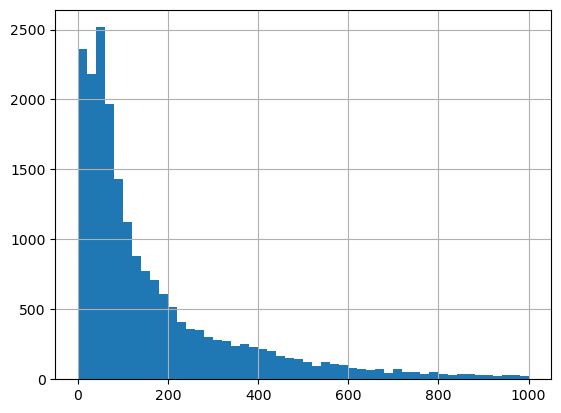

In [14]:
data['days_exposition'].hist(bins=50, range=(0, 1000));  # строим гистограмму для столбца 'days_exposition'

In [15]:
data['days_exposition'].describe()  # выведем числовое описание данных

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Данные в этом столбце имеют слишком большое стандартное отклонение (почти 220 дней) и разброс значений от 1 до 1580 дней.  
Кроме этого, среднее арифметическое и медиана отличаются почти в 2 раза (181 день против 95).   
Неоднородность данных видна и на гистограмме. Оставим пропуски в этом столбце без изменений. 

Пропусков в столбце `ceiling_height` - высота потолка 9195 (почти 40%).  
Но высота потолка - величина, как правило, стандартная, что подтверждается гистограммой, изображенной в пункте 1 выше.   
Для того, чтобы понять каким значением лучше заменить эти пропуски, построим более детальную гисторгамму и диаграмму размаха.

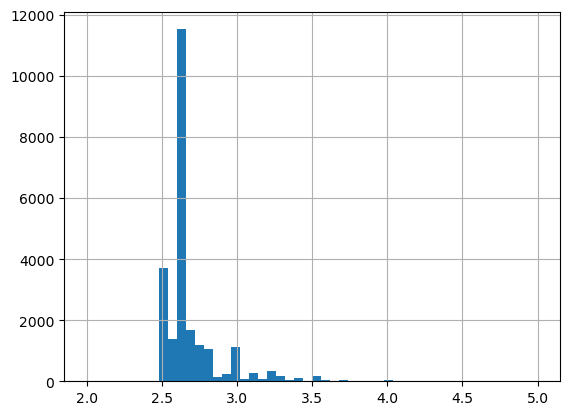

In [124]:
data['ceiling_height'].hist(bins=50, range=(2, 5));  # строим гистограмму для столбца 'ceiling_height'

In [17]:
# Выведем конец списка уникальных значений столбца 'ceiling_height' и количество их упоминаний
data['ceiling_height'].value_counts().tail(10)

ceiling_height
3.43    1
4.30    1
3.39    1
3.98    1
4.65    1
5.00    1
2.20    1
2.34    1
3.93    1
3.59    1
Name: count, dtype: int64

(0.0, 110.0)

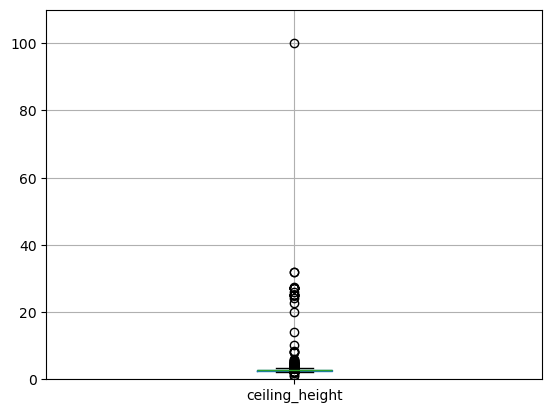

In [18]:
data.boxplot('ceiling_height')  # строим диаграмму размаха для столбца 'ceiling_height'
plt.ylim(0, 110)  # задаём пределы по оси y

In [19]:
data['ceiling_height'].describe()  # выведем числовое описание данных

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

При анализе графической информации и на гистограмме, и на диаграмме размаха, а также, исходя из числового описания данных, становиться очевидным, что на данные влияют выбросы данных в виде минимальной высоты потолка 1,0 м и максимальной высоты потолка 100 м, поэтому среднее арифметическое не будет отражать реальную картину данных.  
Отсортируем таблицу по убыванию значений столбца 'ceiling_height' для выяснения причины появления выбросов.

In [20]:
# Сортировка датафрейма по столбцу 'ceiling_height' и печать первых 10 строк таблицы
data.sort_values(by='ceiling_height', ascending=False).head(10)  

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,False,...,8.0,0.0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.0,6.0,55.5,5,False,...,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
21377,19,4900000.0,42.0,2017-04-18T00:00:00,1,27.5,24.0,37.7,19,False,...,11.0,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
20478,11,8000000.0,45.0,2017-07-18T00:00:00,1,27.0,4.0,22.0,2,False,...,10.0,1.0,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0
22938,14,4000000.0,98.0,2018-03-15T00:00:00,4,27.0,2.0,73.0,2,True,...,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
21824,20,2450000.0,44.0,2019-02-12T00:00:00,2,27.0,2.0,38.0,2,False,...,8.6,2.0,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
10773,8,3800000.0,58.0,2017-10-13T00:00:00,2,27.0,10.0,30.1,3,False,...,8.1,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0
17857,1,3900000.0,56.0,2017-12-22T00:00:00,3,27.0,5.0,33.0,4,False,...,NaN,0.0,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0


Высота потолка 100 м соответствует высоте 37 этажного дома (100 м разделить на 2,65 м - медианное значение высоты потолка в квартирах). Очень сомнительно, что высота потолка в доме или квартире может быть 100 м или 1 м. 
Кроме того, в данных верхних строк отсортированной таблицы интересующего нас столбца вероятно пропущен разделитель целой и дробной части (2,7 м вместо 27 м). Наиболее реальная высота потолка может быть в диапазоне от 2 до 10 метров.      

In [21]:
# Сформируем срез данных по столбцу 'ceiling_height', отбросив высоту потолка меньше 2м и больше 10 м,
# выведем числовое описание среза данных
data.query('2 <= ceiling_height <= 10')['ceiling_height'].describe()

count    14453.000000
mean         2.727987
std          0.292385
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

In [22]:
# Находим % значений, у которых высотa потолка меньше 2м или больше 10 м
((data['ceiling_height'] > 10) | (data['ceiling_height'] < 2)).mean()

0.0011882028431996604

В данный срез попали 23537 строк, мы не включили 0,1% всех строк.  
Медиана осталась без изменений, а среднее значение уменьшилось. 
Поэтому заменим пропуски в столбце `ceiling_height` на медианное значение.

In [23]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [24]:
# Проверим количество пропусков в данных после проведенной обработки данных
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Мы избавились от пропусков в столбцах: `floors_total`, `locality_name`, `is_apartment`, `ceiling_height`, `balcony`.   

Оставили без изменений пропуски в столбцах: `living_area`, `kitchen_area`, `airports_nearest`, `city_centers_nearest`, `parks_around3000`, `ponds_around3000`, `parks_nearest`, `ponds_nearest`, `days_exposition`   


Также восстановим корректное значение для аномальных значений потолка.  
Заменим высоту потолка свыше 20 м на значение, поделенное на 10. Отбросим значения меньше 2 м. 

In [25]:
# С помощью метода loc заменим значения в столбце 'ceiling_height' превышающие 20 м на значение высоты , деленное на 10. 
# Округлим полученные значения до 1 знака после запятой.
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = (data.loc[data['ceiling_height'] >= 20, 'ceiling_height']/10).round (1)

In [26]:
# Отбросим значения меньше 2 м.
data = data.query('ceiling_height >= 2')

In [27]:
# Проверим полученный результат, отсортировав по возрастанию уникальные значения в столбце 'ceiling_height'
sorted(data['ceiling_height'].unique())

[2.0,
 2.2,
 2.25,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.49,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.63,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.7,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,
 4.0,
 4.06,
 4.1,

***В каждом столбце установим корректный тип данных.***

Выявлены следующие проблеммы в типах данных:  
- в столбце `first_day_exposition` тип `object` вместо `datetime64` не позволит производить операции с датой публикации объявления;  

- в столбцах `floors_total`, `balcony` вещественный тип данных `float64` заменим на целочисленный `int64`;

- `days_exposition`, `parks_around3000` вещественный тип данных `float64` невозможно исправить на `int64` в связи с пропусками в данных в этом столбце;

- в столбце `is_apartment` тип  `object` вместо логического типа `bool`, необходимого для созддания булева массива.  

In [28]:
# Заменим тип данных в столбце `first_day_exposition` с `object` на `datetime64` 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [29]:
# В столбцах `floors_total`, `balcony` вещественный тип данных `float64` заменим на целочисленный `int64`
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)

In [30]:
# Заменим в столбце `is_apartment` тип `object` на логический тип `bool`
data['is_apartment'] = data['is_apartment'].astype(bool)

In [31]:
data.dtypes  # выведем информацию о типах данных в таблице

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int32
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

***Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты.***

In [32]:
# Отсортируем перечень уникальных значений в столбце 'locality_name' по алфавиту 
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [33]:
# Подсчитаем количество уникальных значений в столбце 'locality_name' 
len(data['locality_name'].unique())

364

В списке населенных пунктов встречаются слова, отличающиеся буквами "е" и "ё". Заменим словосочетание "городской поселок" на "посёлок городского типа" и ещё несколько пар неявных дубликатов.

In [34]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .str.replace('городской поселок', 'поселок городского типа')
    .str.replace('деревня Кудрово', 'Кудрово')
    .str.replace('поселок Любань', 'Любань')
    .str.replace('поселок Мурино', 'Мурино')
    .str.replace('село Никольское', 'Никольское')
    .str.replace('коттеджный поселок Лесное', 'поселок Лесное')
    .str.replace('поселок при железнодорожной станции Приветнинское', 'поселок станции Приветнинское')
    .str.replace('поселок при железнодорожной станции Вещево', 'поселок станции Вещево')
    .str.replace('поселок станции Громово', 'поселок Громово')
    .str.replace('поселок городского типа Рябово', 'поселок Рябово')
    )    

In [35]:
# Проверим количество уникальных значений в измененном столбце 'locality_name' 
len(data['locality_name'].unique())

314

In [36]:
# Проверим количество строк-дубликатов в данных. 
data.duplicated().sum()

0

In [ ]:
***После предобработки данных названия всех столбцов датафрейма записаны в едином стиле, пропуски данных оставлены только в столбцах, в которых нет смысла их заменять или удалять, обработаны редкие и выбивающиеся значения (аномалии), в каждом столбце установлен корректный тип данных и отсутствуют дубликаты.***

### Добавление в таблицу новых столбцов

***Цена одного квадратного метра.***  
(нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой)

In [37]:
data['metr_price'] = round(data['last_price'] / data['total_area'], 2)

***День недели публикации объявления.***  
(0 — понедельник, 1 — вторник и так далее)

In [38]:
data['weekday'] = data['first_day_exposition'].dt.weekday

***Месяц публикации объявления.***

In [39]:
data['month'] = data['first_day_exposition'].dt.month

***Год публикации объявления.***

In [40]:
data['year'] = data['first_day_exposition'].dt.year

***Тип этажа квартиры.***  
(значения — «‎первый», «последний», «другой»)

In [41]:
# Создадим функцию categorize_floors, которая на основании данных из столбца `floor` сформирует новый столбец `floor_type`,
# в который войдут следующие категории: первый, последний, другой

def categorize_floors(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else: 
        return 'другой'
data['floor_type'] = data.apply(categorize_floors, axis=1)

***Расстояние до центра города в километрах.***  
(перевод из м в км и округление до ближайших целых значений)

In [42]:
data['city_centers_km'] = round(data['city_centers_nearest'] / 1000, 0)

In [43]:
data.head()  # вывод первых 5 строк файла

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metr_price,weekday,month,year,floor_type,city_centers_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23562 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23562 non-null  int64         
 1   last_price            23562 non-null  float64       
 2   total_area            23562 non-null  float64       
 3   first_day_exposition  23562 non-null  datetime64[ns]
 4   rooms                 23562 non-null  int64         
 5   ceiling_height        23562 non-null  float64       
 6   floors_total          23562 non-null  int32         
 7   living_area           21697 non-null  float64       
 8   floor                 23562 non-null  int64         
 9   is_apartment          23562 non-null  bool          
 10  studio                23562 non-null  bool          
 11  open_plan             23562 non-null  bool          
 12  kitchen_area          21340 non-null  float64       
 13  balcony              

***Вывод:    в таблицу добавлены новые параметры:***  
           - цена одного квадратного метра;  
           - день публикации объявления (0 - понедельник, 1 - вторник и т. д.);  
           - месяц публикации объявления;  
           - год публикации объявления;  
           - тип этажа квартиры (значения — «первый», «последний», «другой»);  
           - расстояние до центра города в километрах.   
           Типы данных в столбцах соответствуют содержимому.

### Исследовательский анализ данных

In [45]:
# Изучим числовое описание данных для определения параметров построения гистограмм
data.describe().T  

,count,mean,min,25%,50%,75%,max,std
total_images,23562.0,9.878576,0.0,6.0,9.0,14.0,50.0,5.6812
last_price,23562.0,6540398.645998,12190.0,3400000.0,4646500.0,6790000.0,763000000.0,10911567.783279
total_area,23562.0,60.324656,12.0,40.0,52.0,69.7,900.0,35.658884
first_day_exposition,23562,2017-11-10 08:45:06.187929600,2014-11-27 00:00:00,2017-05-15 00:00:00,2017-12-12 00:00:00,2018-08-26 00:00:00,2019-05-03 00:00:00,NaN
rooms,23562.0,2.070707,0.0,1.0,2.0,3.0,19.0,1.078636
ceiling_height,23562.0,2.698926,2.0,2.6,2.65,2.7,14.0,0.253139
floors_total,23562.0,10.67507,1.0,5.0,9.0,16.0,60.0,6.592765
living_area,21697.0,34.456023,2.0,18.6,30.0,42.3,409.7,22.046524
floor,23562.0,5.878321,1.0,2.0,4.0,8.0,33.0,4.871683
kitchen_area,21340.0,10.561376,1.3,7.0,9.1,12.0,112.0,5.900909


In [46]:
# Сформируем матрицу корреляции величин для понимания зависимости между различными величинами
#data.corr()  

***1. Подробнее изучим некоторые параметры объектов и построим отдельные гистограммы для каждого из этих параметров.***

***Общая площадь***

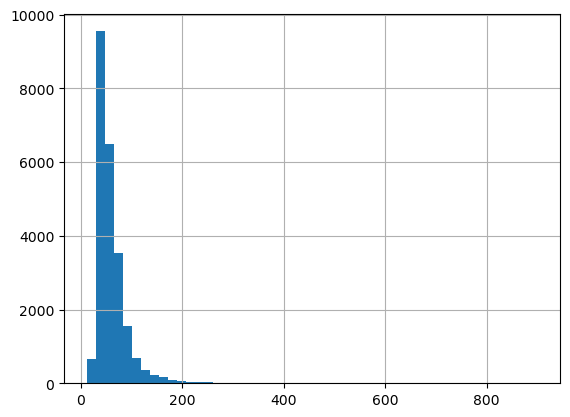

In [125]:
# строим гистограмму для столбца 'total_area'
# параметры range определяем по данным таблицы с числовым описанием данных
data['total_area'].hist(bins=50, range=(12, 900)); 

(10.0, 1000.0)

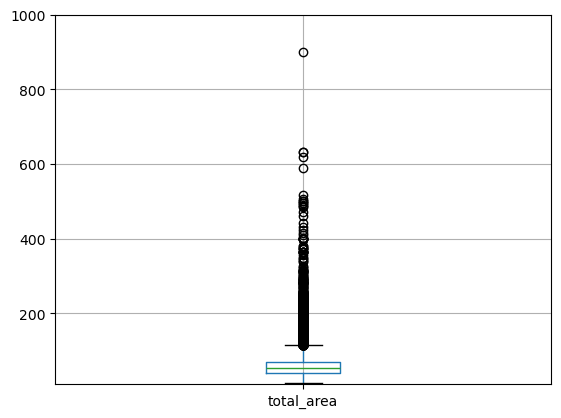

In [48]:
data.boxplot('total_area')  # строим диаграмму размаха для столбца 'total_area'
plt.ylim(10, 1000)  # задаём пределы по оси y

На гистограмме видно, что распределение площади квартиры не является нормальным, а близко к распределению Пуассона.  
По числовому описанию данных и диаграмме размаха понятно, что большая часть квартир имеет площадь, близкую к медианному значению 52 м2.  

Среднее значение больше медианы и составляет 60 м2. На него влияют выбросы (максимальное значение площади 900м2) и достаточно большое количество данных, превышающих характерный разброс (площадь превышает 69,7*1,5=104,55 м2). Выясним, являются ли эти данные достоверными, и действительно соответствуют очень большим помещениям или обусловлены вероятной ошибкой (пропущена "," в написании числа).  

Для этого отсортируем датафрейм по убыванию значений в столбце 'total_area'.

In [49]:
data.sort_values(by='total_area', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metr_price,weekday,month,year,floor_type,city_centers_km
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,NaN,2.0,318.0,106.0,466666.67,2,12,2017,последний,8.0
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4,322.3,4,False,...,NaN,2.0,210.0,NaN,221799.75,1,4,2019,последний,5.0
3117,19,140000000.0,631.0,2019-03-30,7,2.65,5,NaN,5,False,...,NaN,2.0,210.0,NaN,221870.05,5,3,2019,последний,5.0
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7,258.0,5,False,...,NaN,2.0,198.0,111.0,485436.89,0,12,2017,другой,5.0
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.0,3,False,...,767.0,0.0,NaN,14.0,110169.49,3,2,2019,другой,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19558,2,1686000.0,13.2,2018-12-17,1,2.65,5,NaN,1,False,...,361.0,1.0,155.0,19.0,127727.27,0,12,2018,первый,4.0
19807,0,3800000.0,13.0,2018-07-04,1,2.65,5,10.0,3,False,...,592.0,3.0,27.0,9.0,292307.69,2,7,2018,другой,1.0
19546,3,1850000.0,13.0,2019-03-11,1,3.40,5,NaN,2,False,...,644.0,0.0,NaN,24.0,142307.69,0,3,2019,другой,5.0
17961,3,1400000.0,13.0,2017-12-03,1,2.60,9,NaN,1,False,...,NaN,1.0,185.0,410.0,107692.31,6,12,2017,первый,16.0


Максимальное значение площади соответствует помещению с 12 комнатами, жилой площадью 409,7 м2 и высокой стоимостью, что позволяет сделать **вывод о достоверности информации об общей площади**. Аналогичный вывод можно сделать и по остальным лидерам рейтинга площади помещения.   


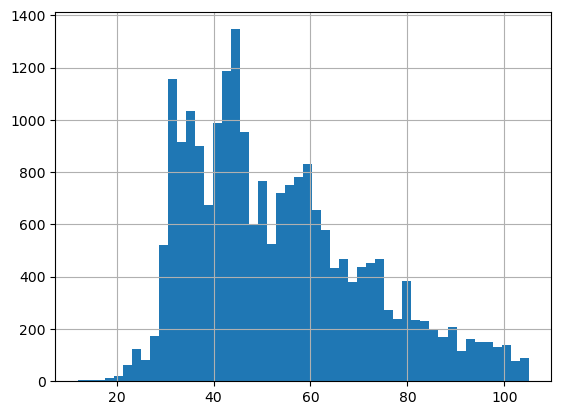

In [126]:
# Сформируем срез данных по столбцу 'total_area', отбросив данные по общей площади, превышающей характерный разброс(105 м2)
data.query('total_area <= 105')['total_area'].hist(bins=50, range=(12, 105));

На последней гистограмме видны группы всплесков, характерные для общей площади одно-, двух- и трехкомнатным квартир.  
**Чаще продают двухкомнатные квартиры, чуть реже - однокомнатные.**

***Жилая площадь***

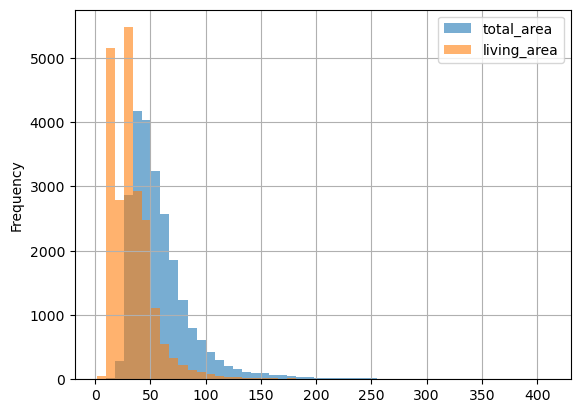

In [127]:
# построим в одной системе координат гистограмму для столбца 'living_area'  в сравнении с 'total_area'
ax = data['total_area'].plot(
    kind='hist', 
    y='total_area', 
    range=(2, 410), 
    bins=50, 
    linewidth=5,
    alpha=0.6, 
    label='total_area',
    legend=True
)
data['living_area'].plot(
    kind='hist', 
    y='living_area', 
    range=(2, 410), 
    bins=50, 
    linewidth=5, 
    alpha=0.6, 
    label='living_area', 
    ax=ax, 
    grid=True, 
    legend=True
);

В целом, данные по жилой площади повторяют данные по общей площади, что вполне логично (коэффициент корреляции 0.939771 говорит об очень сильной взаимосвязи величин).  
Но на гистограмме жилой площади заметны всплески частоты появления.  
Сформируем срез данных по столбцу 'living_area' по площади от 10 м2 до 50 м2 и выведем данные на гистограмме.

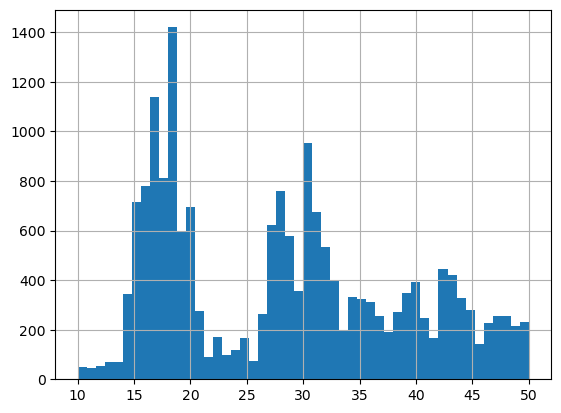

In [128]:
data.query('10 <=living_area <= 50')['living_area'].hist(bins=50, range=(10, 50));

**Частотные всплески наблюдаются при жилой площади от 15 до 18 м2 и на 30 м2. Это может быть обусловлено типичной застройкой, а также соответствующими всплесками общей площади для одно-двухкомнатных квартир.** 

***Площадь кухни***

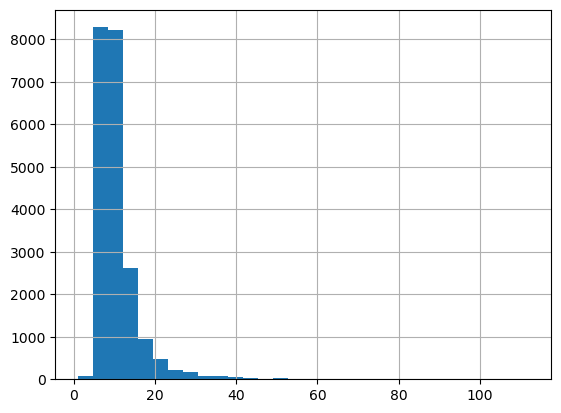

In [129]:
# строим гистограмму для столбца 'kitchen_area'
# параметры range определяем по данным таблицы с числовым описанием данных
data['kitchen_area'].hist(bins=30, range=(1, 112));  

Гистограмма площади кухни похожа на гистограмму общей площади, что подтверждает зависимость этих величин (коэффициент корреляции 0.609238).  
Среднее арифметическое 10,6 и медианна данных 9,1 очень близки. Распределение данных близко к нормальному, если не учитывать максимальные значения, которые вероятнее всего соответствующие максимальным значениям общей площади.  

In [54]:
# Выясним площадь кухни для максимальных значений общей площади:
data.query('total_area >= 590')['kitchen_area']

3117      60.0
5358     100.0
12859     19.5
15651     70.0
19540    112.0
Name: kitchen_area, dtype: float64

Действительно максимальному значению общей площади соответствует максимальное значение площади кухни.

In [55]:
# Выясним долю строк датафрейма, в которых площадь кухни находится в диапазоне 5-15 м2
# Для этого разделим количество строк среза данных на общее количество строк без пропуско в столбце 'kitchen_area'
data.query('5 <= kitchen_area <= 15')['kitchen_area'].count() / data['kitchen_area'].count()

0.8837394564198688

**У 88% всех квартир площадь кухни составляет от 5 до 15 м2.**  
Сформируем срез данных по столбцу 'kitchen_area' по наиболее типичной площади и выведем данные на гистограмме для более детального изучения.

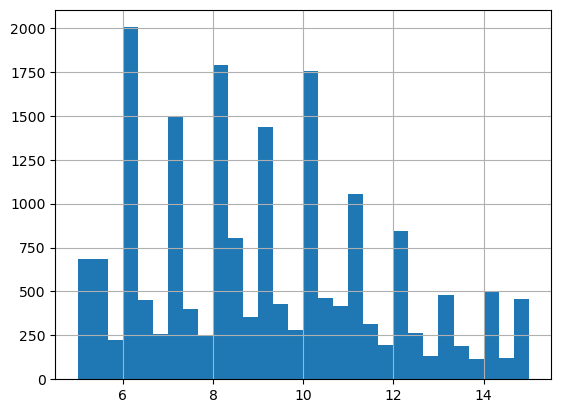

In [130]:
data.query('5 <=kitchen_area <= 15')['kitchen_area'].hist(bins=30, range=(5, 15));

**Среди типичного метража кухни выделяются всплески данных, которые можно объяснить типичной планировкой квартир и близкими значениями площади как для однокомнатных квартир, так и для двух-трехкомнатных.**

***Цена объекта***  
Разброс данных по цене объекта может быть очень большим, поэтому сначала изучим отдельно числовое опиание данных  
и диаграмму размаха по столбцу 'last_price'.

In [57]:
data['last_price'].describe()  # выведем числовое описание данных

count    2.356200e+04
mean     6.540399e+06
std      1.091157e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646500e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

(10000.0, 780000000.0)

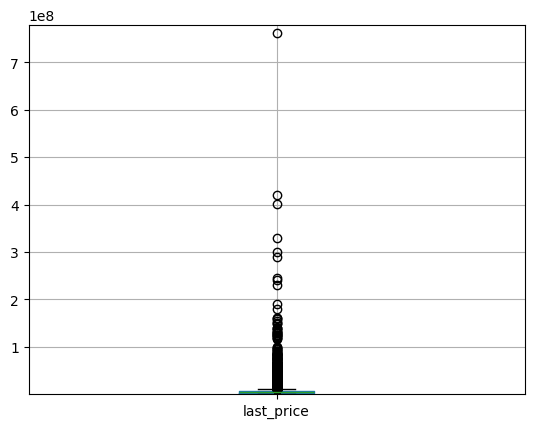

In [58]:
data.boxplot('last_price')  # строим диаграмму размаха для столбца 'last_price'
plt.ylim(10000, 780000000)  # задаём пределы по оси y

In [59]:
# Вычислим, во сколько раз максимальное значение цены превышает медиану
data['last_price'].max() / data['last_price'].median()

164.20962014419456

Цена недвижимости отличается на несколько порядков от минимального значения в 12,2 тыс.руб. до максимального в 763 млн.руб.  
Средняя цена составляет 6,54 млн.руб., что почти на 2 млн.руб. больше медианного значения цены 4,65 млн.руб.  
***На среднюю цену сильно влияет максимальное значение, которое в 164 раза превышает медиану.***  
Построим гистограмму по срезу данных от минимального значения до размаха верхнего "уса"  

In [60]:
# Вычисляем границу верхнего "уса": межквартильный размах, увеличенный в 1,5 раза, прибавить к 3 квартили
(
    (data['last_price'].quantile(0.75) 
 - data['last_price'].quantile(0.25)) * 1.5 
+ data['last_price'].quantile(0.75)
)

11875000.0

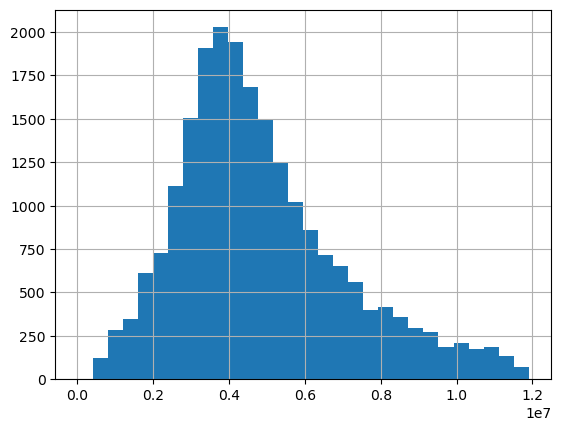

In [131]:
# строим гистограмму для столбца 'last_price' по срезу данных от 12190 до 11875000
data.query('12190 <= last_price <= 11875000')['last_price'].hist(bins=30, range=(12000, 11900000));  

In [62]:
# Выясним долю строк датафрейма, в которых цена находится в диапазоне 2-6 млн.руб.
# Для этого разделим количество строк среза данных на общее количество строк без пропуско в столбце 'last_price'
data.query('2000000 <= last_price <= 6000000')['last_price'].count() / data['last_price'].count()

0.6330956625074272

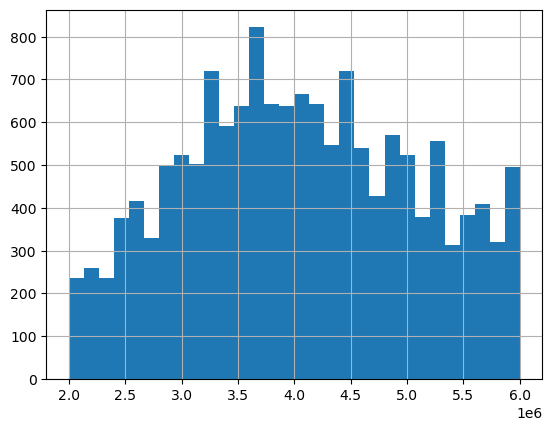

In [132]:
# строим гистограмму для столбца 'last_price' по срезу данных от 2 до 6 млн.руб.
data.query('2000000 <= last_price <= 6000000')['last_price'].hist(bins=30, range=(2000000, 6000000));  

**Медиана 4,65 млн.руб. оптимально описывает цену недвижимости в отличие от среднего значения.  
Строки с ценой в промежутке от 2 млн. руб. до 6 млн.руб. составляет максимальную долю всех строк датафрейма - 63%.  
На гистограмме по вышеуказанному срезу 'last_price' распределение, близкое к нормальному, но вершина смещена относительно медианы в меньшую сторону, что может говорить о большом количестве данных с ценой, выше типичной.**  

***Количество комнат***

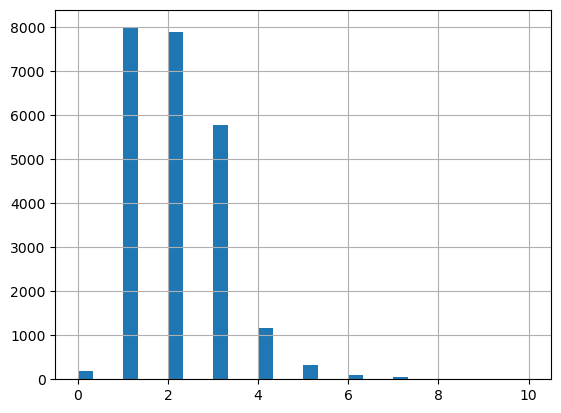

In [133]:
# строим гистограмму для столбца 'rooms'
# параметры range определяем по данным таблицы с числовым описанием данных
data['rooms'].hist(bins=30, range=(0, 10));  

In [65]:
# Вычислим долю однокомнатных квартир
data.query('rooms == 1')['rooms'].count() / data['rooms'].count()

0.3396570749511926

In [66]:
# Вычислим долю двухкомнатных квартир
data.query('rooms == 2')['rooms'].count() / data['rooms'].count()

0.3350734233087174

In [67]:
# Вычислим долю трехкомнатных квартир
data.query('rooms == 3')['rooms'].count() / data['rooms'].count()

0.2452678040913335

(0.0, 20.0)

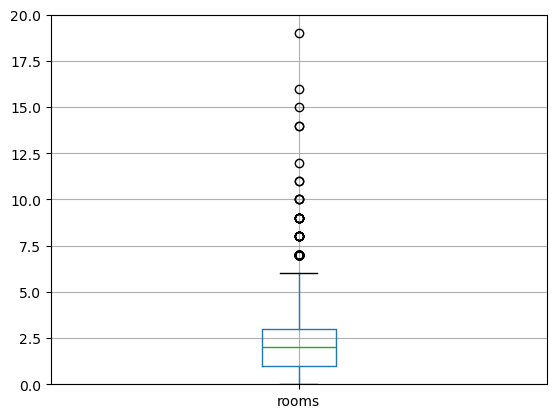

In [68]:
data.boxplot('rooms')  # строим диаграмму размаха для столбца 'rooms'
plt.ylim(0, 20)  # задаём пределы по оси y

На диаграмме размаха видны значения, превышающие стандартное отклонение.  
Максимальный коэффициент корреляции у количества комнат с жилой площадью (0.846113) и общей площадью квартиры (0.758735).  

Выясним какое количество комнат соответствует максимальным значениям общей площади квартир.

In [69]:
# Выясним значение столбца 'rooms' для максимальных значений 'total_area':
data.query('total_area >= 590')['rooms']

3117      7
5358     15
12859     7
15651     7
19540    12
Name: rooms, dtype: int64

In [70]:
# Выясним значение столбца 'rooms' для максимальных значений 'total_area':
data.query('rooms == 19')['total_area']

14498    374.6
Name: total_area, dtype: float64

**Доля продаваемых однокомнатных квартир самая большая (33,97%).**  
Двухкомнатных квартир предлагается к продаже почти столько же, как и однокомнатных (33,5%). Медианное значение количества комнат(равна 2), и среднее значение (2,07) говорят о том, что распределение количества комнат близко к нормальному.  
Доля продаваемых трехкомнатных квартир составляет 24,5%.  

Таким образом, **1-3 комнатные квартиры составляют почти 92% всего рынка недвижимости.**  

Максимальное значение  - 19 комнат соответствует квартире с общей площадью 374,6 м2  
Лидеры рынка недвижимости по общей площади (590 м2 и более) имеют по 7, 12, 15 комнат.

***Высота потолков***

Высота потолков была подробно изучена во 2 разделе проекта "Предобработка данных" с целью обработки пропусков и аномалий.  
Наиболее реальная высота потолка может быть в диапазоне от 2 до 10 метров.
Были отброшены аномальные значения высоты потолка меньше 2 метров, заменена высота потолка свыше 20 м на значение, поделенное на 10. Пропуски данных заменены медианным значением.  

Выведем диаграмму размаха и гистограмму для столбца 'ceiling_height' по обновленным данным.


(1.0, 11.0)

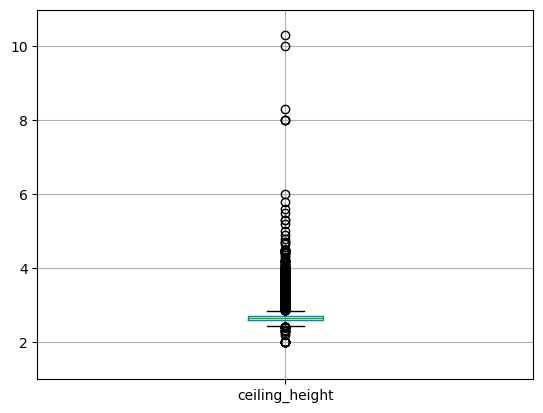

In [71]:
data.boxplot('ceiling_height')  # строим диаграмму размаха для столбца 'rooms'
plt.ylim(1, 11)  

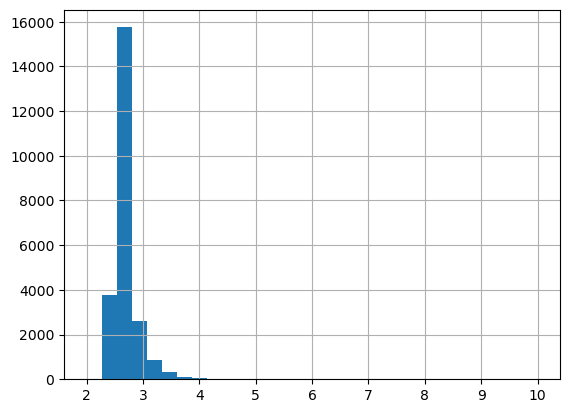

In [134]:
 data['ceiling_height'].hist(bins=30, range=(2, 10));  

На гистограмме пик значений -  медианное значение высоты потолка (2,65м), обусловлен как первоначально высокой долей таких значений, так и заменой пропущенных значений на медиану. Для высоты потолка характерна группировка большей части всех значений в промежутке от 2,5 до 2,8 метров.   

***Тип этажа квартиры («первый», «последний», «другой»)***

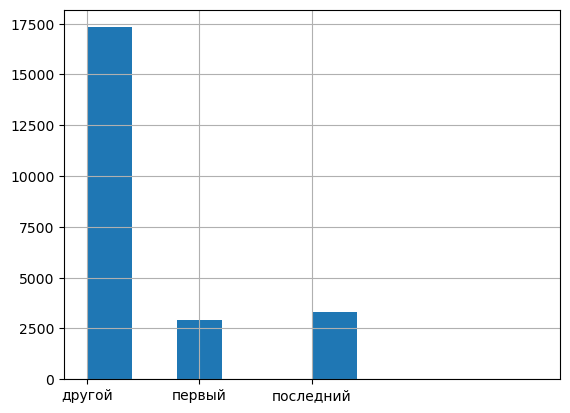

In [135]:
# строим гистограмму для столбца 'floor_type'
data['floor_type'].hist(bins=10, range=(0, 4));  

In [74]:
# Выведем долю квартир каждого типа:
# Доля квартир на первом этаже
len(data.query('floor_type == "первый"')) / data['floor_type'].count()

0.12341906459553519

In [75]:
# Доля квартир на последнем этаже
len(data.query('floor_type == "последний"')) / data['floor_type'].count()

0.1413292589763178

In [76]:
# Доля квартир на других этажах
len(data.query('floor_type == "другой"')) / data['floor_type'].count()

0.735251676428147

Квартиры на первом этаже продают чуть реже, чем квартиры на последнем этаже (12,3% против 14,1% соответственно). Большая часть предлагаемых квартир находиться на других этажах, что может быть обусловлено значительно большим количеством средних этажей в доме, чем крайних. 

***Общее количество этажей в доме***

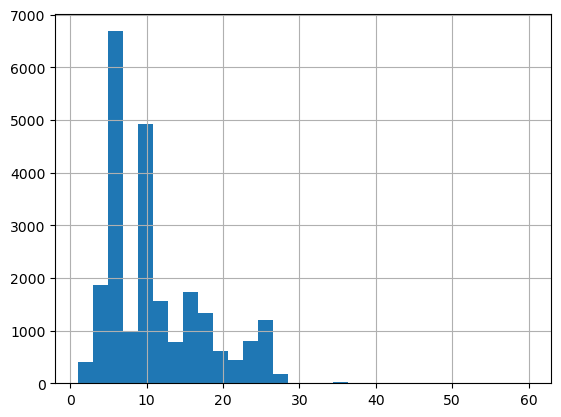

In [136]:
# строим гистограмму для столбца 'floors_total'
# параметры range определяем по данным таблицы с числовым описанием данных
data['floors_total'].hist(bins=30, range=(1, 60)); 

In [78]:
# Вычислим долю пятиэтажных домов
data.query('floors_total == 5')['floors_total'].count() / data['floors_total'].count()

0.24509803921568626

In [79]:
# Вычислим долю девятиэтажных домов
data.query('floors_total == 9')['floors_total'].count() / data['floors_total'].count()

0.15949410067057126

На гистограмме выделяются несколько столбцов с наиболее частыми значениями количества этажей в доме, соответствующие первой квартили - 5 этажей в доме и медиане - 9 этажей в доме. **Пятиэтажных домов больше (24,5%), чем девятиэтажных (15,9%)**  
Практически все дома меньше 30 этажей. Домов свыше 30 этажей крайне мало.

(1.0, 60.0)

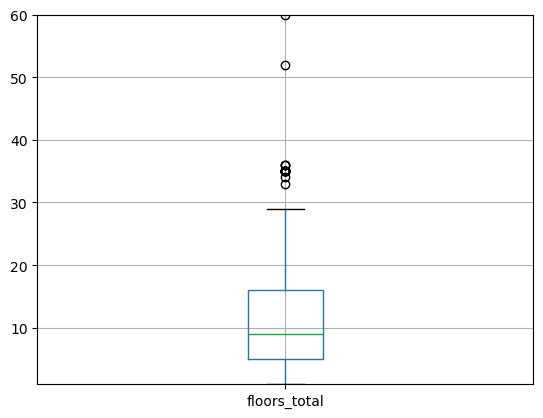

In [80]:
data.boxplot('floors_total')  # строим диаграмму размаха для столбца 'rooms'
plt.ylim(1, 60)  

На диаграмме размаха видны выбросы. Изучим подробнее данные по квартирам в домах максимальной этажности и выясним в каких населенных пунктах расположены самые высокие дома. 

In [81]:
# Выясним значение столбца 'locality_name' для максимальных значений 'floors_total':
data.query('floors_total == 60')['locality_name']

2253    Кронштадт
Name: locality_name, dtype: object

In [82]:
# Сформируем срез данных по столбцу 'floors_total' для значений, больших 30
data.query('floors_total >= 30')['locality_name'].count()

31

In [83]:
# Сортировка датафрейма по столбцу 'floors_total',
# печать первых 31 строк таблицы для значений 'floors_total', больших 30
data.sort_values(by='floors_total', ascending=False)['locality_name'].head(31)  

2253           Кронштадт
16731    Санкт-Петербург
397      Санкт-Петербург
11079    Санкт-Петербург
5807     Санкт-Петербург
9186     Санкт-Петербург
4855     Санкт-Петербург
20938    Санкт-Петербург
9370     Санкт-Петербург
18218    Санкт-Петербург
12888    Санкт-Петербург
5808     Санкт-Петербург
21809    Санкт-Петербург
1917     Санкт-Петербург
7236     Санкт-Петербург
15982    Санкт-Петербург
18617    Санкт-Петербург
1060     Санкт-Петербург
21599    Санкт-Петербург
22946    Санкт-Петербург
18629    Санкт-Петербург
871      Санкт-Петербург
13975    Санкт-Петербург
9579     Санкт-Петербург
5749     Санкт-Петербург
2966     Санкт-Петербург
12960    Санкт-Петербург
8496     Санкт-Петербург
14347    Санкт-Петербург
1697     Санкт-Петербург
11575    Санкт-Петербург
Name: locality_name, dtype: object

Максимальное значение этажей дома соответствует недвижимости в Крондштадте. Однако, все остальные высотные дома расположены в Санкт-Петербурге. Это представляется странным. Выясним этажность домов в Крондштадте в базе объявлений. 

In [84]:
# Построим срез данных по Кронштадту и выведем список уникальных значений 'floors_total' 
data.query('locality_name == "Кронштадт"')['floors_total'].unique()

array([ 3,  5,  9, 12,  4, 60,  2,  7,  8, 11, 15, 20, 10, 13])

In [85]:
# Выясним значение столбца 'floor' для максимального значения 'floors_total' = 60
data.query('floors_total == 60')['floor']

2253    4
Name: floor, dtype: int64

По данным с сайта https://www.tourister.ru/world/europe/russia/city/kronshtadt/temples/23262 в Крондштадте самое высокое здание - Никольский Морской собор: "Высота собора до купола — 52 м, с крестом — 70,5 м. Собор является самым высоким зданием в Кронштадте". 70,5 м соответствует высоте 27 этажного дома (70,5 м разделить на 2,65 м - медианное значение высоты потолка в квартирах). Таким образом, в Крондштадте не может быть квартиры на 60 этаже. Вероятно, это ошибка, обусловленная неверным заполнением данных, должно быть 6 вместо 60. Заменим значение 'floors_total' = 60 на 6. 

In [86]:
data['floors_total'] = data['floors_total'].where(data['floors_total'] != 60, 6)

In [87]:
# Построим срез данных по Кронштадту и выведем список уникальных значений 'floors_total' 
data.query('locality_name == "Кронштадт"')['floors_total'].unique()

array([ 3,  5,  9, 12,  4,  6,  2,  7,  8, 11, 15, 20, 10, 13])

In [88]:
# Построим срез данных по Санкт-Петербургу и выведем список уникальных значений 'floors_total' 
data.query('locality_name == "Санкт-Петербург"')['floors_total'].unique()

array([16,  5, 14, 24,  9, 12, 17,  3, 23, 19,  4, 22,  8,  2, 10,  7, 13,
       15, 25,  6, 11, 18, 20, 28, 36, 21, 35, 27, 26, 34,  1, 33, 52])

Рейтинг самых высоких зданий в Санкт-Петербурге возглавляет "Лахта Центр" - 87 этажей  
(по данным https://peterburg.center/ln/samye-vysokie-zdaniya-sankt-peterburga-top-10-dominant-v-severnoy-stolice-reyting-2019.html).    

Таким образом данные по максимальным значениям общего количества этажей в доме не вызывают сомнения.

***Расстояние до центра города в метрах***

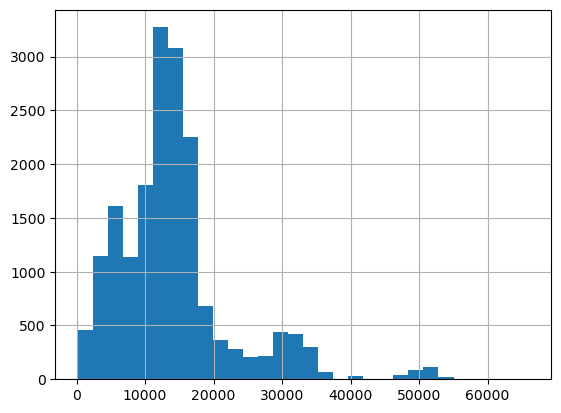

In [137]:
# строим гистограмму для столбца 'city_centers_nearest'
# параметры range определяем по данным таблицы с числовым описанием данных
data['city_centers_nearest'].hist(bins=30, range=(181, 66000));  

In [90]:
# Выведем количество пропусков в столбце 'city_centers_nearest' после проведенной обработки данных
data['city_centers_nearest'].isna().sum()

5500

Основная доля квартир расположена на расстоянии не более 18000м от центра города, что обосновано наличием в данных объявлений по небольшим населенным пунктам, в которых общее расстояние от центра города до его окраин небольшое.  
Среднее расстояние 14 192 м чуть больше медианного значения 13 095 м, что указывает на наличие небольшой доли недвижимости, расположенной на удалении от центра на расстоянии, большем 20000 м.   
На гистограмме наблюдается большое количество данных с расстоянием до центра города меньше среднего. С учетом количества 5500 пропусков в этом столбце, можно предположить, что продавцы охотнее декларируют выгодное расположение жилья относительно центра города, что сказывается на распределении данных.

***Расстояние до ближайшего парка***

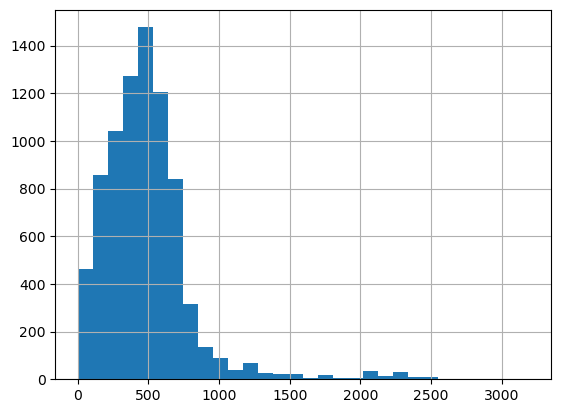

In [138]:
# строим гистограмму для столбца 'parks_nearest'
# параметры range определяем по данным таблицы с числовым описанием данных
data['parks_nearest'].hist(bins=30, range=(1, 3190));  

В данных о расстоянии до ближайшего парка в метрах пропуски в большей половине строк.  Результативных строк всего 8029 из 23562 (34%). Поэтому здесь также можно предположить заполнение этой позиции в объявлении только в случае выгодного расположения жилья относительно парка. Эта гипотеза подтверждается данными гистограммы, которая смещена влево к минимальным значениям расстояния до парка. Пик гистограммы близок к среднему значению (491 м).

In [92]:
# Посмотрим, какая доля от изначального количества данных осталась после фильтрации.
# Для этого поделим количество строк итоговой таблицы на количество строк первоначальной таблицы
data.shape[0] / data_start[0]

0.9942191653656273

После фильтрации в таблице осталось 99,4% данных (> 90%), поэтому мы можем провести актуальный анализ данных.

***2. Изучим, как быстро продавались квартиры (столбец days_exposition)***     

Количество дней размещения на сайте было изучено во 2 разделе проекта "Предобработка данных" с целью обработки пропусков.  
Пропуски в этом столбце были оставлены без изменений.  

In [93]:
data['days_exposition'].describe()  # числовое описание данных столбца 'days_exposition'

count    20391.000000
mean       180.751704
std        219.743958
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Данные в этом столбце имеют слишком большое стандартное отклонение (почти 220 дней) и разброс значений от 1 до 1580 дней.  
Кроме этого среднее арифметическое и медиана отличаются почти в 2 раза (181 день против 95).   
Неоднородность данных видна и на гистограмме. 

Выведем диаграмму размаха и гистограмму для столбца 'days_exposition' по обновленным данным.

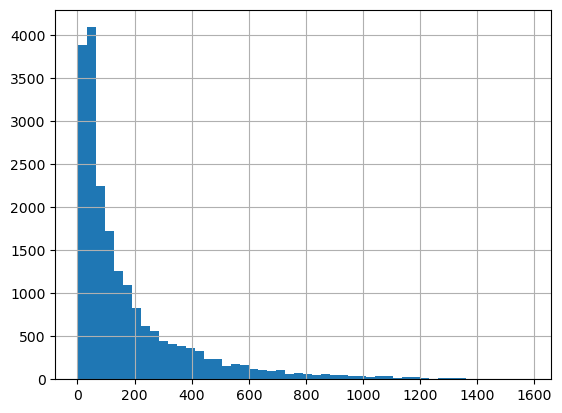

In [139]:
# строим гистограмму для столбца 'days_exposition'
data['days_exposition'].hist(bins=50, range=(1, 1580));  

(1.0, 1580.0)

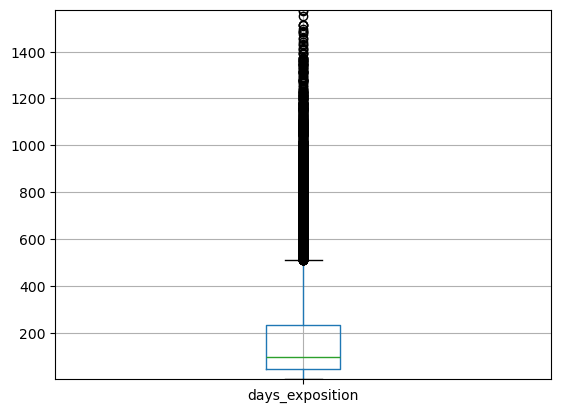

In [95]:
data.boxplot('days_exposition')  # строим диаграмму размаха для столбца 'days_exposition'
plt.ylim(1, 1580)  

In [96]:
# Вычисляем границу верхнего "уса": межквартильный размах, увеличенный в 1,5 раза, прибавить к 3 квартили
(
    (data['days_exposition'].quantile(0.75) 
 - data['days_exposition'].quantile(0.25)) * 1.5 
+ data['days_exposition'].quantile(0.75)
)

510.0

In [97]:
# Вычислим долю объявлений, 'days_exposition' для которых больше 510 дней
data.query('days_exposition >= 510')['days_exposition'].count() / data['days_exposition'].count()

0.08204600068657741

Максимальное количество дней размещения объявления 1580 (больше четырех лет). На диаграмме размаха нет единичных выбросов, что может говорить о наличии большого количества долгих продаж. Можно считать необычно долгими продажами 8.2% объявлений,которые были размещены больше количества дней, превышающих верхний "ус" - 510 дней (примерно 1 год 5 месяцев).  
Можно считать значение медианы наиболее типичным сроком для продажи квартиры. Он составляет 95 дней.
Но большая часть квартир продается быстро, в первые 3 месяца. Построим гистограмму по срезу данных до медианного значения, равного 95 дням. 

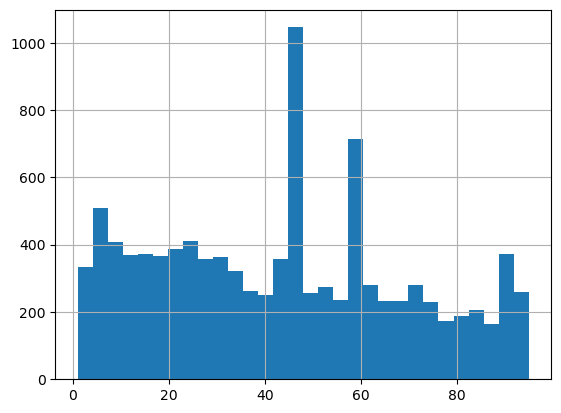

In [140]:
data.query('days_exposition <= 95')['days_exposition'].hist(bins=30, range=(1, 95)); 

На гистограмме наблюдается почти плавное уменьшение дней продажи с тремямя всплесками данных. Выясним количество дней размещения объявлений с наибольшей частотой от 40 до 100 дней.   

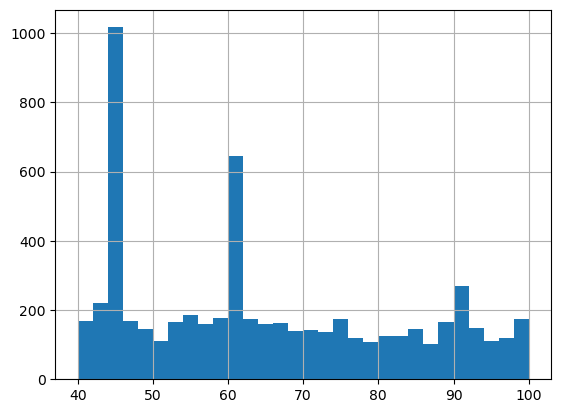

In [141]:
data.query('40 <= days_exposition <= 100')['days_exposition'].hist(bins=30, range=(40, 100)); 

На гистограмме заметны пики примерно через 45, 60 и 90 дней после начала продажи. Можно посмотреть на условия размещения объявлений в Яндекс.Недвижимости - https://yandex.ru/support/realty/owner/home/add-ads-housing.html С учетом того, что после формирования датасета правила размещения поменялись, эти пики являются следами автоматического снятия объявлений - поэтому оценивать скорость продажи стоит действительно по диаграмме размаха. Взяв за быстрые продажи до 1 квартиля, а за долгие после 3-го.

***3. Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта.***

In [100]:
# Сформируем сводную таблицу для подготовки данных перед визуализацией 
data.pivot_table(
    index='last_price', 
    values=['rooms','total_area', 'living_area', 'kitchen_area', 'floor', 'weekday', 'month', 'year']
)

,floor,kitchen_area,living_area,month,rooms,total_area,weekday,year
last_price,,,,,,,,
12190.0,25.000000,40.50,32.000000,3.000000,2.000000,109.000000,2.00,2019.00
430000.0,2.000000,6.00,16.000000,5.000000,1.500000,42.200000,0.50,2018.50
440000.0,1.000000,NaN,NaN,7.000000,1.000000,40.000000,1.00,2018.00
450000.0,2.250000,6.60,23.533333,6.000000,1.750000,40.100000,2.25,2017.75
470000.0,2.666667,8.25,30.000000,3.666667,1.333333,40.833333,4.00,2018.00
...,...,...,...,...,...,...,...,...
300000000.0,5.000000,70.00,258.000000,12.000000,7.000000,618.000000,0.00,2017.00
330000000.0,5.000000,40.00,95.000000,4.000000,3.000000,190.000000,2.00,2018.00
401300000.0,9.000000,24.00,204.000000,2.000000,5.000000,401.000000,5.00,2016.00


***Изучение взаимосвязи между общей (полной) стоимостью объекта и общей площадью.***

In [101]:
# Посчитаем коэффициент корреляции Пирсона для общей (полной) стоимость объекта и общей площади
data['last_price'].corr(data['total_area'])

0.6536178879610688

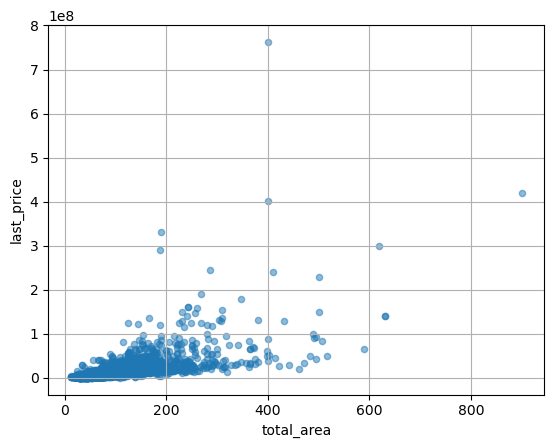

In [143]:
# Построим диаграмму рассеивания 
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.5, grid=True);

Зависимость общей стоимости и общей площади сильнее выражена при площади квартиры до 200 м2 и стоимости до 100 млн.руб. Чем больше общая площадь, тем больше разброс общей стоимости. 

***Изучение взаимосвязи между общей (полной) стоимости объекта и жилой площади.***

In [103]:
# Посчитаем коэффициент корреляции для общей (полной) стоимость объекта и жилой площадью
data['last_price'].corr(data['living_area'])

0.5663774543235293

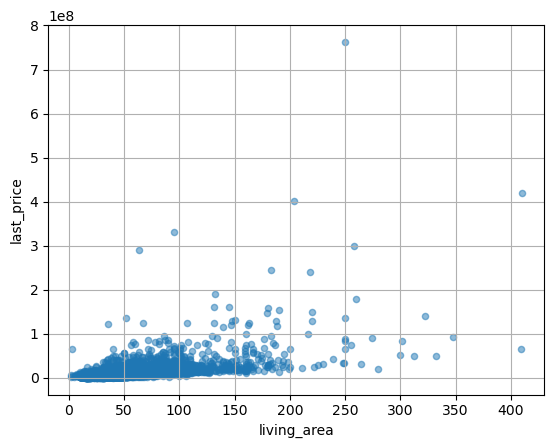

In [144]:
# Построим диаграмму рассеивания 
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.5, grid=True);

Зависимость стоимости объекта от жилой площади чуть менее выражена, чем от общей площади.

***Изучение взаимосвязи между общей (полной) стоимости объекта и площадью кухни.***

In [105]:
# Посчитаем коэффициент корреляции для общей (полной) стоимость объекта и площадью кухни
data['last_price'].corr(data['kitchen_area'])

0.5203510620190291

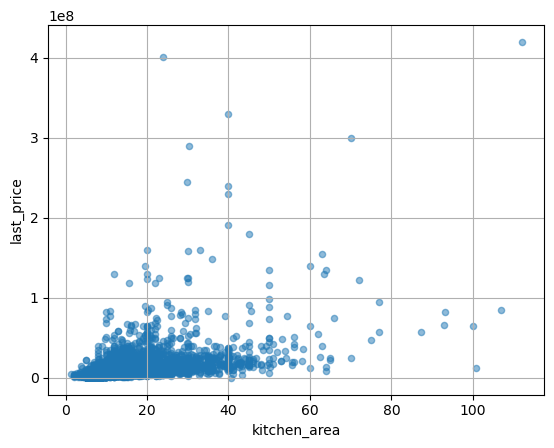

In [145]:
# Построим диаграмму рассеивания 
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.5, grid=True);

Стоимость объекта как правило выше при площади кухни примерно 20 м2. На диаграмме видно значительное отклонение в стоимости при близких значениях площади кухни.

***Изучение взаимосвязи между общей (полной) стоимости объекта и количеством комнат.***

In [107]:
# Посчитаем коэффициент корреляции для общей (полной) стоимость объекта и площадью кухни
data['last_price'].corr(data['rooms'])

0.3631894135098623

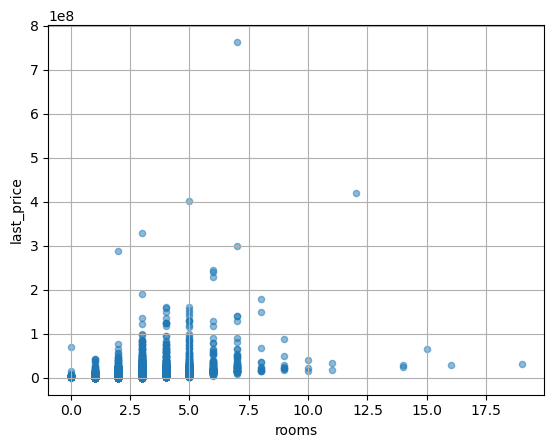

In [146]:
# Построим диаграмму рассеивания 
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.5, grid=True);

Стоимость объекта возрастает пропорционально количеству комнат до 4-5 комнат, однако при большем их количестве, есть тенденция к снижению общей стоимости, причем стоимость объекта при количестве комнат свяше 10 может быть ниже 1-2 комнатных квартир.

***Изучение взаимосвязи между общей (полной) стоимости объекта и этажом,  
на котором расположена квартира (первый, последний, другой).***

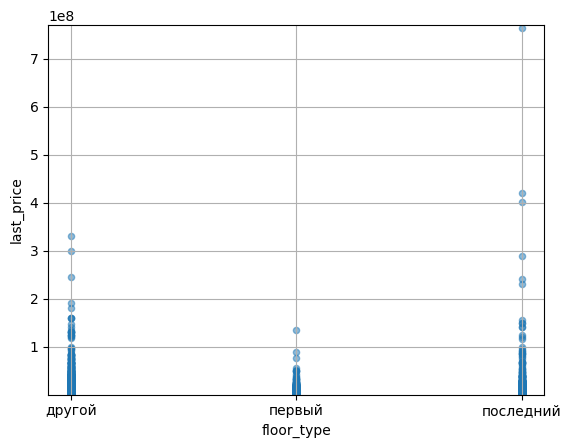

In [149]:
# Построим диаграмму рассеивания 
data.plot(x='floor_type', y='last_price', kind='scatter', alpha=0.5, grid=True, ylim=(1, 770000000));

Наименьшая стоимость объектов, расположенных на первом этаже.  
Последние этажи имеют сильный разброс стоимости (именно на последнем этаже расположена недвижимость максимальной стоимости), но большая часть квартир на последних этажах стоит до 100 млн.руб.  
Стоимость квартир на средних этажах не превышает 350 млн.руб., при наиболее типичной стоимости до 100 млн.руб.

***Изучение взаимосвязи между общей (полной) стоимости объекта и датой размещения (день недели, месяц, год).***

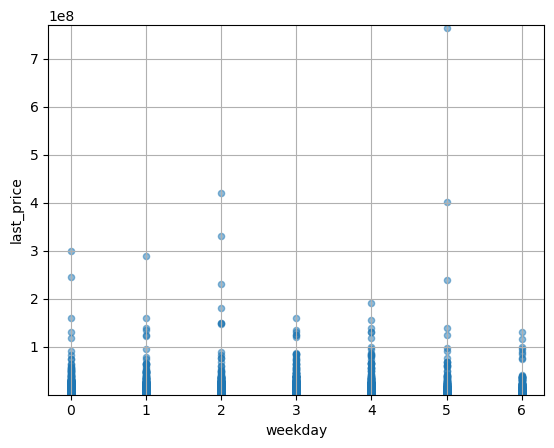

In [150]:
# Построим диаграмму рассеивания для дней недели размещения объявления 
data.plot(x='weekday', y='last_price', kind='scatter', alpha=0.5, grid=True, ylim=(1, 770000000));

Данные по стоимости объекта практически на зависят от дня недели, но во вторник и пятницу были размещены объявления с максимальной стоимостью.

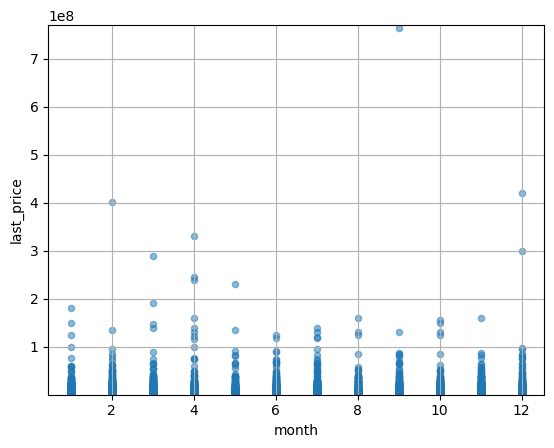

In [151]:
# Построим диаграмму рассеивания для месяцев 
data.plot(x='month', y='last_price', kind='scatter', alpha=0.5, grid=True, ylim=(1, 770000000));

Данные по стоимости объекта практически на зависят от месяца публикации. Самую дорогую недвижимость разместили на сайте объявлений в сентябре.

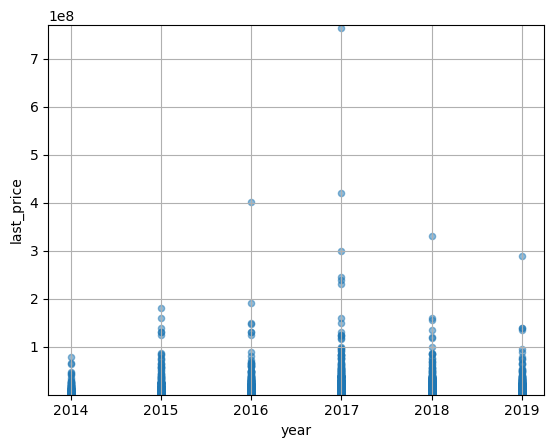

In [152]:
# Построим диаграмму рассеивания для года размещения объявления
data.plot(x='year', y='last_price', kind='scatter', alpha=0.5, grid=True, ylim=(1, 770000000));

Цена по стравненю с 2014 годом в среднем выросла. Наибольшие значения цены наблюдались в 2017 году из-за редких значений. В целом, стоимость объектов в 2015-2019 годах не превышала 200 млн.руб. 

**Больше всего на итоговую стоимость объекта влияет общая и жилая площадь и количество комнат.**

***4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.***

In [113]:
# создаем таблицу 'locality_name_mean' методом pivot_table, группируя по названиям населенных пунктов,
# добавляя столбцы с количеством объявлений и средней ценой квадратного метра
locality_name_mean = data.pivot_table(index='locality_name', values='metr_price', aggfunc=['count', 'mean'])

In [114]:
# переименуем столбцы (мультииндекс) на "количество объявлений" и "средняя цена" соответственно
locality_name_mean.columns = ['ad_count', 'mean_metr_price'] 

In [115]:
# вывод 10 первых строк отсортированной таблицы
locality_name_mean.sort_values(by='ad_count', ascending=False).head(10)

,ad_count,mean_metr_price
locality_name,,
Санкт-Петербург,15649,114870.036956
Мурино,586,86041.116024
Кудрово,470,95260.846128
поселок Шушары,439,78551.344647
Всеволожск,398,68654.473970
Пушкин,369,103125.819377
Колпино,338,75424.579112
поселок Парголово,327,90175.913089
Гатчина,307,68746.146515


In [116]:
# запрос строки с максимальным значением цены квадратного метра
locality_name_mean[locality_name_mean['mean_metr_price'] == locality_name_mean['mean_metr_price'].max()]

,ad_count,mean_metr_price
locality_name,,
Зеленогорск,24,115122.799583


In [117]:
# запрос строки с минимальным значением цены квадратного метра
locality_name_mean[locality_name_mean['mean_metr_price'] == locality_name_mean['mean_metr_price'].min()]

,ad_count,mean_metr_price
locality_name,,
деревня Старополье,3,11206.22


**Количество продаваемой недвижимости в Санкт-Петербурге в разы превышает этот показатель по другим населенным пунктам Ленинградской области.  
Средняя стоимость квадратного метра в северной столице 114870 руб., что близко к максимальной средней цене квадратного метра 115123 руб. в городе Зеленогорск. Минимальная цена 11206 руб. в деревне Старополье.** 

***5. Выясним, как стоимость объектов зависит от расстояния до центра города.***

In [118]:
# Сформируем срез объявлений по Санкт-Петербургу
data_spb = data.query('locality_name == "Санкт-Петербург"')

In [119]:
# создаем таблицу 'data_spb_mean' методом pivot_table, группируя по расстоянию до центра в километрах,
# добавляя столбцы с количеством объявлений и средней ценой квадратного метра
data_spb_mean = data_spb.pivot_table(index='city_centers_km', values='metr_price', aggfunc=['count', 'mean'])

In [120]:
# переименуем столбцы(мультииндекс)  на "количество объявлений" и "средняя цена" соответственно
data_spb_mean.columns = ['ad_count', 'mean_metr_price'] 

In [121]:
data_spb_mean

,ad_count,mean_metr_price
city_centers_km,,
0.0,27,245833.530370
1.0,192,177005.407604
2.0,310,157849.007290
3.0,348,121507.831638
4.0,688,133282.874738
5.0,915,140453.957005
6.0,618,151012.193673
7.0,420,156176.879524
8.0,594,125649.733148


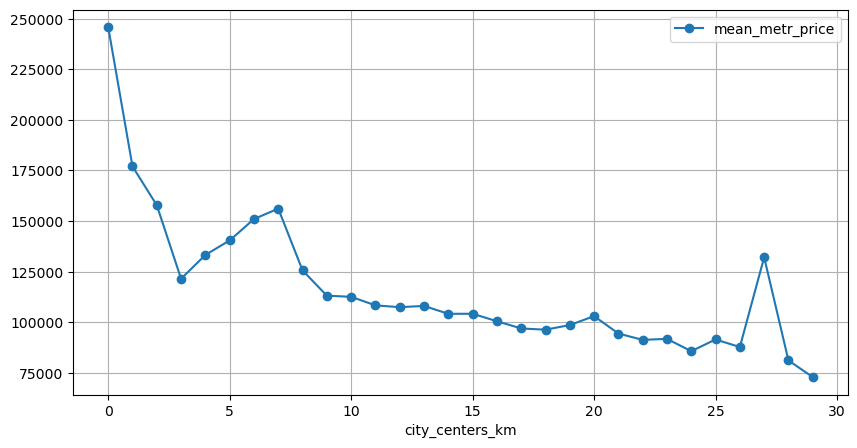

In [153]:
# Строим график изменения средней цены для каждого километра от центра Петербурга
data_spb_mean.plot(y='mean_metr_price', style='o-', grid=True, figsize=(10, 5));

**Цена объекта недвижимости непосредственно в центре Санкт-Петербурга максимальная и превышает среднюю цену квадратного метра по городу в 2,14 раза.  
На расстоянии 1 - 8 и 27 км цена выше средней по городу. Причем обосновано постепенное снижение цены на квартиры, расположенные от центра на 1, 2 и 3 км, но затем идет рост цены на квартиры, расположенные на небольшом удалении от центра (до 8 км), и на расстоянии 27 км, что, вероятно, обусловлено выбором района.  
В целом, чем дальше от центра города, тем дешевле недвижимость (почти плавное снижение цены квадратного метра в зависимости от расстояния от центра с 9 км до 29 км)**

In [123]:
# Проверим количество строк-дубликатов в данных после произведенных преобразований. 
data.duplicated().sum()

0

### Общий вывод

**Целью данного проекта было исследование объявлений о продаже квартир для определяения рыночной стоимости объектов недвижимости.**  

**Входные данные от сервиса Яндекс Недвижимость** — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.  
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**1.** **Изучение общей информации о данных** выявило проблеммы в исходных данных.    

**2. Была проведена предобработка данных**.
- Названия всех столбцов датафрейма записаны в едином стиле.    
- Обнаружены пропуски в данных, которые вписаны пользователем (наиболее вероятной причиной таких пропусков является отсутствие информации у продавца или невнимательное заполнение ячеек в объявлении).  
- Обнаружены пропуски в данных, которые получены автоматически на основе картографических данных (причины могут быть технического характера).  
- Заполние пропущенных значений в столбцах: floors_total, locality_name, is_apartment, ceiling_height, balcony, parks_around3000, ponds_around3000.  
- Оставили без изменений пропуски в столбцах, в которых нет смысла их заменять или удалять: living_area, kitchen_area, airports_nearest, city_centers_nearest, parks_nearest, ponds_nearest, days_exposition.  
- Восстановлено корректное значение для аномальных значений потолка (заменили высоту потолка свыше 20 м на значение, поделенное на 10, отбросили значения меньше 2 м).
- В каждом столбце установлен корректный тип данных.   
- Устранены неявные дубликаты в столбце с названиями населенных пунктов.


**3. В таблицу добавлены новые параметры**, которые будут использоваться в исследовании:   
- цена одного квадратного метра;  
- день публикации объявления (0 - понедельник, 1 - вторник и т. д.);  
- месяц публикации объявления;  
- год публикации объявления;  
- тип этажа квартиры (значения — «первый», «последний», «другой»);  
- расстояние до центра города в километрах.   

Типы данных в столбцах соответствуют содержимому.

**4. Проведен исследовательский анализ данных.**  
- Подробно изучены параметры: общая и жилая площадь; площадь кухни; цена объекта; количество комнат;
высота потолков; тип этажа квартиры («первый», «последний», «другой»); общее количество этажей в доме;
расстояние до центра города в метрах; расстояние до ближайшего парка.  
- Изучено, как быстро продавались квартиры.   
- Определены факторы, которые больше всего влияют на общую (полную) стоимость объекта.  
- Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.  
- Выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.  
- Описано, как стоимость объектов зависит от расстояния (в км) до центра Петербурга. 

 **Главные выводы.**  
 
**1. Почти 92% всего рынка недвижимости составляют 1-3 комнатные квартиры.  
Лидеры продаж - двухкомнатные квартиры, на втором месте - однокомнатные, на третьем месте - продажи трехкомнатных квартир.**  
*Доля продаваемых однокомнатных квартир самая большая (33,97%).  
Двухкомнатных квартир предлагается к продаже почти столько же, сколько однокомнатных (33,5%).   
Доля продаваемых трехкомнатных квартир составляет 24,5%.  
Частотные всплески наблюдаются при жилой площади от 15 до 18 м2 и на 30 м2. Это может быть обусловлено типичной застройкой, а также соответствующими всплесками общей площади для одно-двухкомнатных квартир.  
У 88% всех квартир площадь кухни составляет от 5 до 15 м2.*
  
**2. В основном продается жилье на средних этажах дома. Квартиры на последних этажах продают чаще, чем на первых.**  
*Квартиры на первом этаже продают чуть реже, чем квартиры на последнем этаже (12,3% против 14,1% соответственно). 
Большая часть предлагаемых квартир находиться на других этажах, что может быть обусловлено значительно большим количеством средних этажей в доме, чем крайних.*

**3. К продаже предлагают чаще квартиры в домах типичной советской застройки: пятиэтажных и девятиэтажных.**  
*Пятиэтажных домов больше (24,5%), чем девятиэтажных (15,9%)
Практически все дома меньше 30 этажей. Квартир в небоскребах свыше 30 этажей крайне мало.*  
  
**4. Большая часть квартир продается в течение трёх месяцев. Быстрыми можно считать продажи до 45 дней, а долгими свыше 231 дня.**  
*Можно считать значение медианы оптимальным сроком для продажи квартиры. Он составляет 95 дней. Но большая часть квартир продается быстро. Быстрые продажи можно считать до 45 дней (1 квартиля), а за долгие свыше 231 дня (после 3-го квартиля)*

**5. Стоимость 63% всего жилья находится в диапазоне от 2 до 6 млн.руб.**  
*Медиана 4,65 млн.руб. оптимально описывает цену недвижимости в отличие от среднего значения, на которе сильно влияет максимальное значение, которое в 164 раза превышает медиану.*  
  
**6. Общая стоимость объекта недвижимости больше всего зависит от общей площади. Квартиры с большой кухней как правило стоят дороже.**  
*Зависимость общей стоимости и общей площади сильнее выражена при площади квартиры до 200 м2 
и стоимости до 100 млн.руб. Чем больше общая площадь, тем больше разброс общей стоимости. Зависимость стоимости объекта от жилой площади чуть менее выражена, чем от общей площади. Стоимость как правило выше при площади кухни примерно 20 м2.*
  
**7. Стоимость квартиры зависит от количества комнат.**    
*Стоимость возрастает пропорционально количеству комнат до 4-5 комнат, однако при большем их количестве, есть тенденция к снижению общей стоимости причем стоимость объекта при количестве комнат свяше 10 может быть ниже 1-2 комнатных квартир.*

**8. Стоимость квартиры зависит от типа этажа. Первый этаж - самый дешевый.**  
*Наименьшая стоимость объектов, расположенных на первом этаже.
Последние этажи имеют сильный разброс стоимости (именно на последнем этаже расположена недвижимость максимальной стоимости), но большая часть квартир на последних этажах стоит до 100 млн.руб.
Стоимость квартир на средних этажах не превышает 350 млн.руб., при наиболее типичной стоимости до 100 млн.руб.*

**9. Цены на недвижимость выросли с 2014 года. Цена не зависит от дня недели и месяца публикации объявления.**  
*Данные по стоимости объекта практически на зависят от дня недели, но во вторник и пятницу были размещены объявления с максимальной стоимостью, и не зависят от месяца публикации. 
Цена по стравненю с 2014 годом в среднем выросла. Наибольшие значения цены наблюдались в 2017 году 
из-за редких значений. В целом, стоимость объектов в 2015-2019 годах не превышала 200 млн.руб.*

**10. Количество продаваемой недвижимости в Санкт-Петербурге в разы превышает этот показатель по другим 
населенным пунктам Ленинградской области. Средняя стоимость квадратного метра в Санкт-Петербурге выше и близка к максимальной по области.**  
*Средняя стоимость квадратного метра в северной столице 114870 руб., что близко к максимальной 
средней цене квадратного метра 115123 руб. в городе Зеленогорск. Минимальная цена 11206 руб. в деревне Старополье.*  
  
**11. Чем дальше от центра города, тем дешевле квартиры.**  
*Цена объекта недвижимости непостредственно в центре Санкт-Петербурга максимальная и превышает среднюю цену 
квадратного метра по городу в 2,14 раза. На расстоянии 1-8 и 27 км цена выше средней по городу. 
Причем обосновано постепенное снижение цены на квартиры, расположенные от центра на 1, 2 и 3 км, 
но затем идет рост цены на квартиры, расположенные на небольшом удалении от центра (до 8 км), и на расстоянии 27 км, 
что, вероятно, обусловлено выбором района. Самый дорогой по стоимости жилья район в Санкт-Петербурге риелторы назвали "Золотой треугольник". Дома "Золотого треугольника" находятся в пределах Невского проспекта, набережной реки Фонтанки и Дворцовой набережной. Для географической справки: https://zen.yandex.ru/media/id/5cb4ebcc0a51a300b5b1f60d/zolotoi-treugolnik-sanktpeterburga-chto-eto-i-gde-nahoditsia-5edf942db1204610073e88b2 
В целом, чем дальше от центра города, тем дешевле недвижимость (почти плавное снижение цены квадратного метра в
 зависимости от расстояния от центра с 9 км до 29 км)*

  
**Рекомендации.**  

Для определения рыночной стоимости объекта нежвижимости необходимо учитывать следующие основные факторы:
- общую площадь квартиры;   
- жилую площадь и площадь кухни;    
- количество комнат;  
- тип этажа расположения квартиры и количество этажей в доме;   
- населенный пункт;  
- расположение относительно центра города.  

Факторов, влияющих на рыночную стоимость недвижимости значительно больше. Например транспортная доступность, социальная инфраструктура, год постройки жилья, наличие парковок и т.д.  
Для более точного определения стоимости объекта недвижимости нужно учитывать влияние различных фактров на основные.  
